In [2]:
# ---Packages---
import xarray as xr # read netcdf-files

# standard data analysis packages:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import math 


import glob # allows for wildcards in filemanagement

# Extra matplotlib management tools
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

Plotly express: scatter mapbox

https://www.youtube.com/watch?v=1-6ndLqsy6M



In [4]:
# testing reading nav.nc files


file_nav = '../2022-islas/as220005/ISLAS_SAFIRE-ATR42_CORE_NAV_1HZ_20220310_as220005_L1_V1.nc'
file_tdyn = '../2022-islas/as220005/ISLAS_SAFIRE-ATR42_CORE_TDYN_1HZ_20220310_as220005_L1_V1.nc' 

ds_nav=xr.open_dataset(file_nav)
ds_tdyn=xr.open_dataset(file_tdyn)

In [6]:
ds_tdyn

<xarray.Dataset> Size: 801kB
Dimensions:     (time: 5137, level: 2)
Coordinates:
  * time        (time) datetime64[ns] 41kB 2022-03-10T12:44:14.680128 ... 202...
    LATITUDE    (time) float32 21kB ...
    LONGITUDE   (time) float32 21kB ...
    ALTITUDE    (time) float32 21kB ...
Dimensions without coordinates: level
Data variables: (12/32)
    trajectory  |S100 100B ...
    time_bnds   (time, level) datetime64[ns] 82kB ...
    PRES        (time) float32 21kB ...
    DYNP        (time) float32 21kB ...
    TAS1        (time) float32 21kB ...
    TAS2        (time) float32 21kB ...
    ...          ...
    HABS3       (time) float32 21kB ...
    RH1         (time) float32 21kB ...
    RH2         (time) float32 21kB ...
    RH3         (time) float32 21kB ...
    P_CABIN     (time) float32 21kB ...
    T_CABIN     (time) float32 21kB ...
Attributes: (12/33)
    creator_name:              SAFIRE
    creator_email:             UAR2859.campagne@safire.fr
    flight_id:                 as220005
    processing_level:          L1
    featureType:               Trajectory
    flight_date:               2022-03-10
    ...                        ...
    time_coverage_end:         2022-03-10T14:09:51.320024Z
    time_coverage_resolution:  PT1.000000S
    geospatial_lon_min:        -0.03872990170001522
    geospatial_lon_max:        1.4334486985999992
    geospatial_lat_min:        43.096763471299994
    geospatial_lat_max:        43.61465996469999

In [2]:
# ---Data---
# Particle-by-particle NetCDF-files(.pbp.nc) are created by SODA2 when using it on an
# image file (if the netcdf-option is chosen)
# In my process, these files are stored in a results-folder, separate from the input-data

# Local disk path of data:
path_in = 'Results_2022-islas/Testing/'

#File1: Brown and Francis
test1 = 'BF/' # Chosen flight
filepath = path_in + test1 + "03222022_113721_CIP.nc" #"*CIP.pbp.nc"
print(filepath)
ds1 = xr.open_dataset(filepath)

#File2: Heymsfield
test2 = 'H2010/' # Chosen flight
filepath = path_in + test1 + "03222022_113721_CIP.nc" #"*CIP.pbp.nc"
print(filepath)
ds2 = xr.open_dataset(filepath)

Results_2022-islas/Testing/BF/03222022_113721_CIP.nc
Results_2022-islas/Testing/BF/03222022_113721_CIP.nc


In [3]:
# ---Data---
# Particle-by-particle NetCDF-files(.pbp.nc) are created by SODA2 when using it on an
# image file (if the netcdf-option is chosen)
# In my process, these files are stored in a results-folder, separate from the input-data

# Local disk path of data:
path_in = 'Results_2022-islas/'
flight = 'as220009/' # Chosen flight
#filepath = path_in + flight + "*CIP.pbp.nc" #"*CIP.pbp.nc"
filepath = path_in + flight + "*CIP.nc" #"*CIP.pbp.nc"

txt = glob.glob(filepath) # all files ending in *cip.nc as a list
for textfile in txt:
    # Testing: accessing single file:
    # Using data from the as220013 flight
    ds = xr.open_dataset(textfile)
    #TODO: what if more than one file


In [4]:
ds2

<xarray.Dataset> Size: 3MB
Dimensions:           (Time: 2358, Vector64: 64, Vector40: 40)
Dimensions without coordinates: Time, Vector64, Vector40
Data variables: (12/33)
    elapsed_time      (Time) datetime64[ns] 19kB ...
    base_time         datetime64[ns] 8B ...
    utc_time          (Time) float64 19kB ...
    TAS               (Time) float32 9kB ...
    MIDBINS           (Vector64) float32 256B ...
    ACTIVETIME        (Time) float32 9kB ...
    ...                ...
    MVD200            (Time) float32 9kB ...
    IWC200            (Time) float32 9kB ...
    LWC200            (Time) float32 9kB ...
    AREA200           (Time) float32 9kB ...
    MEAN_AREARATIO    (Vector64, Time) float32 604kB ...
    MEAN_ASPECTRATIO  (Vector64, Time) float32 604kB ...
Attributes: (12/51)
    Source:                SODA-2 OAP Processing Software
    DateCreated:           Thu Dec  5 15:09:23 2024
    FlightDate:            03/22/2022
    DateProcessed:         Thu Dec  5 14:56:46 2024
    TimeInterval:          11:37:21-14:53:46
    FN:                    /home/ninalar/Documents/MC2/2022-islas/as220007/mi...
    ...                    ...
    CUSTOMDOF:             0.0
    CLUSTERTHRESH:         0.0
    RAKEFIX:               0
    IGNOREDEADTIME:        0
    STRICTCOUNTER:         0
    ACTIVETIMEFROMMISSED:  0

In [5]:
ds2

<xarray.Dataset> Size: 3MB
Dimensions:           (Time: 2358, Vector64: 64, Vector40: 40)
Dimensions without coordinates: Time, Vector64, Vector40
Data variables: (12/33)
    elapsed_time      (Time) datetime64[ns] 19kB ...
    base_time         datetime64[ns] 8B ...
    utc_time          (Time) float64 19kB ...
    TAS               (Time) float32 9kB ...
    MIDBINS           (Vector64) float32 256B ...
    ACTIVETIME        (Time) float32 9kB ...
    ...                ...
    MVD200            (Time) float32 9kB ...
    IWC200            (Time) float32 9kB ...
    LWC200            (Time) float32 9kB ...
    AREA200           (Time) float32 9kB ...
    MEAN_AREARATIO    (Vector64, Time) float32 604kB ...
    MEAN_ASPECTRATIO  (Vector64, Time) float32 604kB ...
Attributes: (12/51)
    Source:                SODA-2 OAP Processing Software
    DateCreated:           Thu Dec  5 15:09:23 2024
    FlightDate:            03/22/2022
    DateProcessed:         Thu Dec  5 14:56:46 2024
    TimeInterval:          11:37:21-14:53:46
    FN:                    /home/ninalar/Documents/MC2/2022-islas/as220007/mi...
    ...                    ...
    CUSTOMDOF:             0.0
    CLUSTERTHRESH:         0.0
    RAKEFIX:               0
    IGNOREDEADTIME:        0
    STRICTCOUNTER:         0
    ACTIVETIMEFROMMISSED:  0

(10,) (11,)


<BarContainer object of 10 artists>

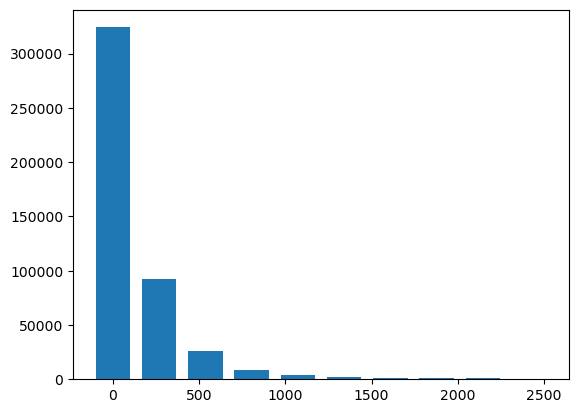

In [4]:
result, bins = np.histogram(ds.areasize)

print(np.shape(result), np.shape(bins))

plt.bar(bins[:-1], result, width = 200)

In [5]:
print(result)
print(bins)

[324176  91958  26400   8510   3894   2303   1566   1122    931    407]
[   0.       268.1057   536.2114   804.31714 1072.4229  1340.5286
 1608.6343  1876.74    2144.8457  2412.9514  2681.0571 ]


In [6]:
np.shape(ds.areasize.values)

(461267,)

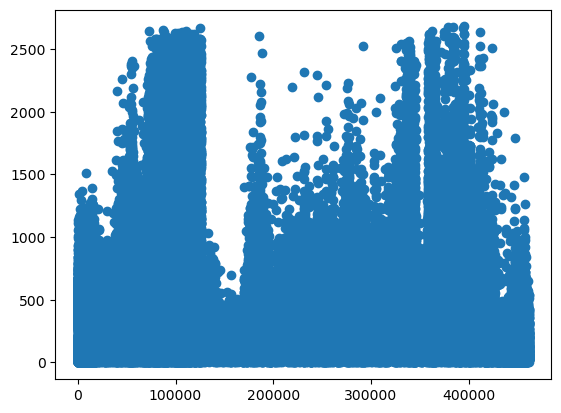

In [7]:
plt.scatter([np.arange(1, len(ds.time.values)+1, 1)], [ds.areasize.values])

# Data variables

## Time related variables
All time related variables are dtype = timedelta64[ns]
- *time*: dimension time 
- *probetime, buffertime, rawtime, reftime*
- *inttime*: interarrival time from previous particle

## Size related variables
- diam: Particle diameter from circle fit. No Poisson spot size corrections applied
- xsize: X-size (across array). No Poisson spot size corrections applied
- ysize: Y-size (along airflow). No Poisson spot size corrections applied
- xextent: Maximum x-size (across array) for a single slice. No Poisson spot size corrections applied
- oned: 1-D emulation size. Number of latched pixels. No Poisson spot size corrections applied
- twod: 2-D emulation size. Maximum number of shaded pixels on a single slice. No Poisson spot size corrections 
applied
- areasize: Equivalent area size. No Poisson spot size corrections applied
- arearatio: Area ratio
- arearatiofilled: Area ratio with particle voids filled
- aspectratio: Aspect ratio
- area: Number of shaded pixels
- areafilled: Number of shaded pixels including voids
- perimeterarea: Number of shaded pixels on particle perimeter
- area75: Number of shaded pixels at the 75% (or grey level-3) shading
- xpos: X-position of particle center (across array)
- ypos: Y-position of particle center (along airflow)


## flags and corrections
- allin: All-in flag (1=all-in)
- centerin: Center-in flag (1=center-in)
- dofflag: Depth of field flag from probe (1=accepted)
- edgetouch: Edge touch (1=left 2=right 3=both)
- sizecorrection: Size correction factor from Korolev 2007 (D_edge/D0). Use to adjust sizes in this file if necessary
- zd: Z position from Korolev correction
- missed: Missed particle count
- overloadflag: Overload flag
- rejectionflag: Particle rejection code (see soda2_reject.pro)

## Additional variables
- probetas: True air speed for probe clock
- aircrafttas: True air speed for aircraft (if available)
- particlecounter: Particle counter
- orientation: Particle orientation relative to array axis



In [8]:
# --- Data exploration ---

# The first step is to look at Dimensions, Coordinates, variables and attributes of ds.
# find the variables you are looing for and potentially useful and/or needed attributes.
# Also check general nc attributes for potentally useful attributes, for quality control etc.

# useful attributes: start and end time, max and min coordinates, takeoff and landing times
# extracting attributes:
# x = ds.attrs['name']

# ectracting coordinate variables
# x = ds.coords['name']

# extract data variables
# x = ds.Variablename


In [9]:
# --- time management

# sample rate of instrument in seconds:
sample_rate = ds.attrs['RATE']
#sample_rate # for testing

# the time variable dtype is timedelta64[ns]
ds.time[1:4].values

array([28853425630125, 28855857664875, 28857685560500],
      dtype='timedelta64[ns]')

In [10]:
#ds.probetime[1:4].values
x= ds.time[-4:-1].values

In [11]:
ds.buffertime[1:4].values

array([28870653000000, 28870653000000, 28870653000000],
      dtype='timedelta64[ns]')

In [12]:
ds.rawtime[1:4].values

array([28852.07400663, 28854.50604137, 28856.333937  ])

In [13]:
ds.reftime[1:4].values

array([28867941131750, 28867941131750, 28867941131750],
      dtype='timedelta64[ns]')

In [14]:
ds.inttime[1:4].values

array([1862319708, 2432034731, 1827895641], dtype='timedelta64[ns]')

## Flags and rejection code management

### Rejection codes

The rejection codes are set i SODA2 in the soda_2_reject-pro file.

From Manual_soda2.pdf: "The particle rejection criteria in SODA-2 serve two purposes, to distinguish between “round”
and “irregular” particles if water processing is enabled, and to remove image artifacts. Image
artifact rejection is based on the area ratio."

Rejection criteria in increasing order of importance:

| Processing option | Variable | Criteria | Details | Reject flag values |
| :- | :- | :- | :- | --- |
| Default | arearatio | Low area ratio | lt 0.10 or gt 1.0 | 1 |
| Default | inttime/nextinttime | Below interarrival time | lt cutoff | 2 |
| Default | binningsize | Out of size range |  | 4 |
| allin | allin | All-in rejection | | 8 |
| centerin | centerin | Center-in rejection | | 8 |
| clusterthresh | clusterthresh/clustercount | Cluster rejection | | 16 |
| Water processing | water | Area ratio < 0.4, Area ratio < 0.5 for particles 10 pixels or larger, Size greater than 6mm, Corrected particle size outside of size-bin range | Water rejection | 32 |
| Irregular only | water | Area ration < 0.5, Area ratio < 0.4 for particles 10 pixels or larger |Irregular-only (non-water) rejection | 64 |
| DOF rejection | dofreject/dofflag | 66% threshold flagged for CIP/PIP/F2DC, level 3 pixel on CIP-G, or 1D2D Mode3 (dofreject=2) | Depth of field flag rejection | 128 |

a particle can be rejected based on more than one criteria, binary sum keeps track of reason.

Binary sums:

| Value | Sums | Flags |
| :- | :- | :- |
| 1 | 1 | arearatio |
| 2 | 2 | interarrival |
| 3 | 1 + 2 | arearatio, interarrival |
| 4 | 4 | out of size range |
| 5 | 1 + 4 | arearatio, out of size range |
| 6 | 2 + 4 | interarrival, out of size range |
| 7 | 1 + 2 + 4 | arearatio, interarrival, out of size range |
| 8 | 8 | allin (or centerin) |
| 9 | 1 + 8 | arearatio, allin |
| 10 | 2 + 8 | interarrival, allin |
| 11 | 1 + 2 + 8 | arearatio, interarrival, allin |
| 12 | 4 + 8 | out of size range, allin |
| 13 | 1 + 4 + 8 | arearatio, out of size range, allin |
| 14 | 2 + 4 + 8 | interarrival, out of size range, allin |
| 15 | 1 + 2 + 4 + 8 | arearation, interarrival,out of size range, allin | 

The larger rejection flags are for some reason set as negative wich gives the following binary sums:

| Value | Sums | Flags |
| :- | :- | :- |
| -128 | -128 | depth of field,  |
| -127 | -128 + 1 | depth of field, arearatio |
| -126 | -128 + 2 |  depth of field, interarrival |
| -125 | -128 + 1 + 2 | depth of field, arearatio, interarrival | 
| -123 | -128 + 1 + 4 | depth of field, arearatio, out of size range |
| -121 | -128 + 1 + 2 + 4| depth of field, arearatio, interarrival, out of size range |
| -120 | -128 + 8 | depth of field, allin |
| -119 | -128 + 1 + 8| depth of field, arearatio, allin|
| -118 | -128 + 2 + 8| depth of field, arearatio, interarrival, allin |
| -117 | -128 + 1 + 2 + 8| depth of field, arearatio, interarrival, allin |
| -115 | -128 + 1 + 4 + 8| depth of field, arearatio, out of size range, allin |
| -113 | -128 + 1 + 2 + 4 + 8| depth of field, arearatio, interarrival, out of size range, allin |


In [15]:

def rejcode_deconstruct(n, base_codes):
    """
    Break down a rejectioncode into the correction types it consist of.
    Input: 
        n: a rejection code from SODA2 (integer), 
        base_codes: a numpy array of basecodes to be used. 
            Example: # rejection codes that equals a single correction type
                    base_codes = np.array([1,2,4,8,16,32,64,128])
    Return: list of "base rejection codes"
    """
    
    # define empty list
    sum_codes = []
    
    # Codes larger than 16 are negative, but if combined with codes lower than 16, these are still positive
    # ex: -125 = -128 + 2 + 1
    # so the negative number must be extracted before the rest of the n can me deconstructed:
    #print(n)
    if n<0:
        i = max(base_codes[base_codes>abs(n)])
        #print(i)
        sum_codes.append(i)
        n=i+n
        print(n)
    
    # as long as n is bigger than 3, find the next base code n is a sum of
    while n > 3:
        print(n)
        
        # get the highest of all the base_codes numbers that are lower than n and append to base array
        i = max(base_codes[base_codes<n])
        
        sum_codes.append(i)
        # subtract the new basecode from n, unless n-1 = 2
        n = n-i

    # n<= 3 needs to be handled separately
    if n == 3:
        sum_codes.append(2)
        sum_codes.append(1)
    elif n == 2 or n == 1:
        sum_codes.append(n)
    
    return sum_codes

# rejection codes that equals a single correction type
#base_codes = np.array([1,2,4,8,16,32,64,128])

# testing function
#n=-113
#rejcode_deconstruct(n, base_codes)

# TODO: 
# - Make each code a categorical parameter
# - add the values from the combination rejection codes to the correct single correction types

In [16]:
# --- flags and information

# Rejection flag
# what caused the particle to be rejected.

# count the occurences of each unique value of rejection code and turn into dataframe(starts out as tuple)
unique_rf, count_rf = np.unique(ds.rejectionflag.values, return_counts = True)
rej_flags = pd.DataFrame(np.asarray((unique_rf,count_rf)).T, columns = ['flag', 'count'])

# separate the base flags from the rest
# rejection codes that equals a single correction type:
base_codes = np.array([1,2,4,8,16,32,64,128])

# create new column that only have the base counts
# before adjusting this includes the counts for the base codes, 
# but set as 0 for the combi flags (keep only counts for baseflags)
rej_flags['basecount'] = rej_flags['count']
rej_flags.loc[~abs(rej_flags['flag']).isin(base_codes), 'basecount'] = 0
rej_flags

,flag,count,basecount
0,0,235411,0
1,1,1778,1778
2,2,92165,92165
3,3,13767,0
4,4,683,683
5,5,4164,0
6,6,121,0
7,7,1761,0
8,8,72691,72691
9,9,317,0


In [17]:
# deconstruct each combo flag and add count to counts of each base flag

# create a view of the database including the combo flags only
mask = abs(rej_flags['flag']).isin(base_codes) # create boolean mask based on the values of the flags == single flags
rej_flags_combo = rej_flags[~mask]   # only combo flags (use false values of mask)

# go through this view updating the counts based on each combo flag
# TODO: build for loop that goes through all combination flags
# FIND OUT WHY THE FUCK THIS IS NOT WORKING UNLESS I AM PRINTING EACH AND EVERY VALUE!!!!!!!!
for i in range(len(rej_flags_combo)):
    #print(i)
    flag = rej_flags_combo.iloc[i,0]
    count = rej_flags_combo.iloc[i,1]
    #print(flag, count)
    
    # deconstruct the combo flag into its basecodes
    combo = rejcode_deconstruct(flag, base_codes)
    #increase the basecount with the count from combo
    rej_flags.loc[abs(rej_flags['flag']).isin(combo), 'basecount'] += count 


rej_flags

5
6
7
9
10
11
12
4
13
5
14
6
15
7


,flag,count,basecount
0,0,235411,0
1,1,1778,26903
2,2,92165,144964
3,3,13767,0
4,4,683,12688
5,5,4164,0
6,6,121,0
7,7,1761,0
8,8,72691,111417
9,9,317,0


In [18]:
rej_flags

,flag,count,basecount
0,0,235411,0
1,1,1778,26903
2,2,92165,144964
3,3,13767,0
4,4,683,12688
5,5,4164,0
6,6,121,0
7,7,1761,0
8,8,72691,111417
9,9,317,0


KeyError: 0

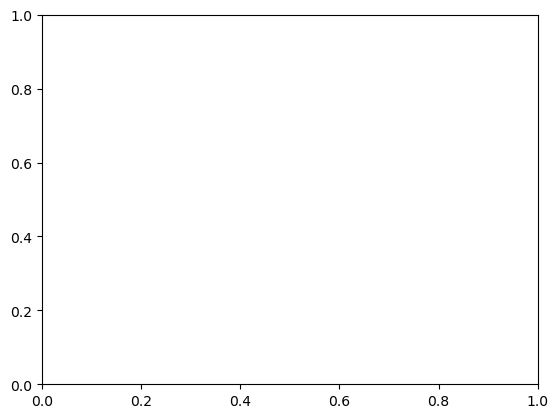

In [19]:
# plot rejection flags as bar plot
fig, ax = plt.subplots()

# separate code and counts from rej_flag tuple, 
# remove counts for rej_code = 0 (Not rejected)
rej_code = np.delete(rej_flags[0],0)
counts = np.delete(rej_flags[1],0)

legend_elements = [Line2D([0],[],color='b', lw=4, label='1 = arearatio'),
                   Line2D([0],[],color='b', lw=4, label='2 = interarrival'),
                   Line2D([0],[],color='b', lw=4, label='3 = arearatio, interarrival'),
                   Line2D([0],[],color='b', lw=4, label='4 = out of size range'),
                   Line2D([0],[],color='b', lw=4, label='5 = arearatio, out of size range'),
                   Line2D([0],[],color='b', lw=4, label='6 = interarrival, out of size range'),
                   Line2D([0],[],color='b', lw=4, label='7 = arearatio, interarrival, out of size range'),
                   Line2D([0],[],color='b', lw=4, label='8 = allin (or centerin)'),
                   Line2D([0],[],color='b', lw=4, label='9 = arearatio, allin'),
                   Line2D([0],[],color='b', lw=4, label='10 = interarrival, allin'),
                   Line2D([0],[],color='b', lw=4, label='11 = arearatio, interarrival, allin'),
                   Line2D([0],[],color='b', lw=4, label='12 = out of size range, allin'),
                   Line2D([0],[],color='b', lw=4, label='13 = arearatio, out of size range, allin'),
                   Line2D([0],[],color='b', lw=4, label='14 = interarrival, out of size range, allin')]

ax.bar(rej_code, counts)

# plot decoration
ax.set_xlabel('Rejection code')
ax.set_ylabel('# rejected particles')
#ax.legend(handles=legend_elements, loc='best')

### Missed particles

(Data Analysis Users Guide2.2.3) The system for registering particle images are storing the images in two buffers, that only are transmitted to the datasystem when they are filled. Registering the images takes some time dependent on concentration, size distribution and columetric flow rate of the particles. 
The system will be unable to store particles for an amount of time if the registrering of buffer 1 is not finished before buffer 2 is filled. And the images will not be recorded. during this deadtime period. Maximum width is still monitored during this deadtime and can be used to find the number of particles that are missed within this period.

In [20]:
# lognormal distribution
# dN/dlogDp: dN number of particles in range, total concentration
# dlogDp: log of lower bin boundary from upper bin boundary logDpu-logDpl


## Number concentration
(From W.Frey, check all refs before writing up)

Number concentration is calculateded based on sample volume, and sample volume changes with size, so concentrations are calculated for the bins separately before bwing added to the total concentration:

$N = \sum \limits_{j=1} ^{k} \frac{n_{j}}{SV _{j}} = \sum \limits _{j=1} ^{k} N _{j}$

- $n _{j}$ : the number of particles in bin j
- $SV _{j}$ : the sample volume of bin j
- $N _{j}$ : the number concentration of bin j

### Sample volume SV

The sample volume is the volume of air that travels through the sample area (SA) during the sample time ($t -{s}$), the speed of the air is equal to the true air speed (TAS):

$SV = SA \cdot TAS \cdot t_{s}$

### Sample area SA

The sample area is the effective array width ($w _{eff}$) and the depth of field (DOF)

the effective array can be determined based on data processing technique:

All-in:

$ w _{eff} = [res(num- 1) -D _{p} = (25 \mu m \cdot 63 - D _{p})$

- res : probe resolution
- num : number of diodes

Center in:

$w _{eff} = res \cdot num = 25 \mu m \cdot 64 $

Reconstruction:

$w' _{eff} = w _{eff} + 2( \frac{D _{p}}{2} - \frac{4 D _{p}}{29}) = w _{eff} + 0.724 D _{p}$

DOF (Knollenberg 1970):

$DOF = \pm 7.5 \times 10 ^{-5} D _{p} ^{2} / \lambda < 10 cm$

$\lambda$ : laser wavelenght in $\mu m$ 0.68 for the CIP


### Variables needed and where to find them:

| Variable | name in NC | Type | Comment |
| :- | :- | :- | :- |
| $n _{j}$ |  | variable | |
| $TAS$ | aircrafttas | variable | |
| $t _{s}$ |  | variable | |
| res | RES | attribute | |
| num | NUMDIODES | attribute | |
| $\lambda$ | WAVELENGTH | attribute | |
| data processing method | EAWMETHOD | attribute | needed to decide which method to calculate effective array width|
| sizing method | SMETHOD  | attribute | the diameter type used in the pre-processing |

In [21]:
# -- constants/ GLOBAL variables --
res = ds.attrs['RES'] # resolution of CIP
num = ds.attrs['NUMDIODES'] # number of diodes
wl = ds.attrs['WAVELENGTH'] # wavelenght of lazer

eaw_m = ds.attrs['EAWMETHOD'] # data processing method from data
s_m = ds.attrs['SMETHOD'] # sizing method from data

In [22]:
# --- FUNCTIONS ---
# relating to sample volume calculations: for cloud parameters specified per volume air

def depth_of_field(diam):
    """
    Function to calculate the DOF for a particular particle with diameter diam
    INPUT:
    diam: a diameter value from the SODA2 nc file, given in \mu m
    
    GLOBAL variable:
    wl: wavelenght of instrument given in \mu m
    
    Output:
    DOF: calculated depth of field for the given particle, given in cm
    
    TODO: 
    - build test for this (test_diam = 213 # \mu m, test_wl = 0.68 # \mu m should give ~10 cm
    - check that everything is in correct units
    - link to references
    """
    
    dof = 7.5*(10**(-5))*(diam**2)/wl
    
    # the maximum depth of field is 10 cm. if dof exceeds this, return max dof
    max_dof = 10
    if dof > max_dof :
        dof = max_dof
    
    return dof

def ea_width_allin(diam):
    """
    Function to calculate the effective array width (w_eff) for a particular particle with diameter diam
    How to calculate this depends on what processing method is used to handle particles that cover one or both of
    the end diodes (parts of particle outside of the measurement area) this function is only valid whem
    eaw_m (data processing method from the SODA2 nc file) is equal to 'allin'
    
    INPUT:
    diam: a diameter value from the SODA2 nc file, given in \mu m
    res: resolution of instrument
    num: number of diodes
    
    OUTPUT:
    w_eff: calculated depth of field for the given particle, given in cm
    
    TODO: 
    - build test for this
    - check that everything is in correct units
    - link to references
    """
    w_eff = res(num-1) - diam
           
    return w_eff

def ea_width_reconstructed(diam):
    """
    Function to calculate the effective array width (w_eff) for a particular particle with diameter diam
    How to calculate this depends on what processing method is used to handle particles that cover one or both of
    the end diodes (parts of particle outside of the measurement area)this function is only valid whem
    eaw_m (data processing method from the SODA2 nc file) is equal to 'allin'
    
    INPUT:
    diam: a diameter value from the SODA2 nc file, given in \mu m
    
    GLOBAL variables needed:
    res: resolution of instrument
    num: number of diodes
    
    OUTPUT:
    w_eff: calculated depth of field for the given particle, given in cm
    
    TODO: 
    - build test for this
    - check that everything is in correct units
    - link to references
    """
    # equation as according to Heymsfield and Parrish (1978)
    w_eff = (res*num) + (0.724* diam) # eq. 2.7, TODO: Q: is w_eff eq 2.6 or 2.5?
     
    return w_eff

def sample_volume(diam, tas, dt):
    #QUESTION: sample time dt: how to decide the timestep?
    """
    Function to calculate the sample volume to calculate cloud particle parameters specified by volume of air.
    
    INPUT:
    diam: diameter of the given particle ()
    tas: TAS (True Air Speed) for the given particle (m/s)
    dt: sample time (s)
    
    GLOBAL variables needed:
    eaw_m: processing method from SODA2 nc file
    res: resolution of instrument ()
    num: number of diodes (1)
    
    Output:
    sv: calculated sample volume (m^3)
    
    TODO: 
    - build test for this
    - Check that all parts have correct units 
    - link to references
    
    """
    # calculate DOF (function)
    dof = depth_of_field(diam)
    
    # calculate effective area width (function dependent on eaw_m)
    print(f'Calculating w_eff based on {eaw_m}')
    if eaw_m == 'centrein' :
        # TODO: check if this is the correct eaw_value!
        # effective width is not dependent on particle diameter for centre in method, only uses GLOBAL variables:
        print(f'Used: centrein') # for testing
        w_eff = res*num
        
    elif eaw_m == 'allin':
        # Use function ea_width_allin
        print(f'Used: allin') # for testing
        w_eff = ea_width_allin(diam)
        
    elif eaw_m == 'reconstructed':
        # Use function ea_width_reconstructed
        print(f'Used: reconstructed') # for testing
        w_eff = ea_width_reconstructed(diam)
        
    else:
        # Give error message:
        print(f'Used: exeption) # for testing
        print("eaw_m value is not as expected, check nc-file")
    
    sv = dof * w_eff * tas * dt
    
    return sv

SyntaxError: unterminated string literal (detected at line 129) (2849480219.py, line 129)

In [23]:
# --- FUNCTIONS ---
# relating to single particle parameters, only for spherical particles
def part_area(diam):
    """
    Function to calculate the particle area from diameter. Only valid for spherical particles
    
    INPUT:
    diam: a diameter value from the SODA2 nc file, given in \mu m
    
    Module needed:
    Math: pi value
    
    OUTPUT:
    p_a: particle area
    
    TODO: 
    - build test for this
    - check that everything is in correct units
    - check if spherical particle
    """
    p_a = math.pi*diam**2
     
    return p_a

def part_volume(diam):
    """
    Function to calculate the particle volume from diameter. Only valid for spherical particles
    
    INPUT:
    diam: a diameter value from the SODA2 nc file, given in \mu m
    
    Module needed:
    Math: pi value
    
    OUTPUT:
    p_v: particle volume
    
    TODO: 
    - build test for this
    - check that everything is in correct units
    - check if spherical particle
    """
    p_v = (math.pi*diam**3)/6
     
    return p_v

def part_mass(diam, x):
    """
    Function to calculate the particle mass from diameter. Only valid for spherical particles
    
    INPUT:
    diam: a diameter value from the SODA2 nc file, given in \mu m
    x: TODO: mystery variable separating ice from water
    
    Module needed:
    Math: pi value
    
    OUTPUT:
    p_m: particle mass
    
    TODO: 
    - build test for this
    - check that everything is in correct units<----- IMPORTANT
    - check if spherical particle
    - check if ice or water
    - Update with better values for rho
    """
    
    # get density (rho) based on ice or water
    # Liquid water has a density around 1 g/ml, ice has a density around 0.91 g/ml, (Reference or better?)
    if x = i :
        rho = 
    elif x = w :
        rho = 
    
    p_v = part_volume(diam)
    p_m = rho*p_v
     
    return p_m

# Mean diameter calculations
def mean_diam_nw(diam):
    """
    Number weighted mean diameter.
    Function to calculate the mean diameter from an xarray data array of n diameters
    
    INPUT:
    diam: a diameter value from the SODA2 nc file, given in \mu m. xarray data array expected
    
    Module needed:
    
    OUTPUT:
    nw_mean_dia: number weighted mean diameter
    
    TODO: 
    - build test for this
    """
    
    # find number of values in the list of diameters:
    n = diam.count() # returns a xarray da
    
    # sum of all diameters in the array given
    sum_diam = diam.sum()
    
    nv_mean_dia = sum_diam/n
     
    return nv_mean_dia

def mean_diam_mw(diam):
    """
    Mass weighted mean diameter.
    Function to calculate the mean diameter from an xarray data array of n diameters
    (assuming particles are spherical)
    
    INPUT:
    diam: a diameter value from the SODA2 nc file, given in \mu m. xarray data array expected
    
    Module needed:
    
    OUTPUT:
    nw_mean_dia: number weighted mean diameter
    
    TODO: 
    - build test for this
    """
    
    # calculate D**3 and D**4  for all the particles (adds as new variables to data array)
    diam_3 = diam**3
    diam_4 = diam**4
    
    # code that works if the full dataset is used
    #ds = ds.assign(diam_3=ds.diam**3)
    #ds = ds.assign(diam_4=ds.diam**4)
    
    # the mass weighted mean is the sum of D^4 divided by the sum of D^3
    nv_mean_dia = diam_4.sum()/diam_3.sum
     
    return nv_mean_dia

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (1181919065.py, line 71)

In [24]:
# -- Number concentration

# bin endpoints:
bin_arr = ds.attrs['ENDBINS']

# The number of particles in size bins defined by bin_arr:
n_j = pd.Series(ds['diam']).value_counts(bins=bin_arr, sort=False)


# The sample volume in size bin j
# use the sample_volume(diam, tas, dt) function to calculate the sample volume
# Questions:
# - again, how to calculate DT
# - should the sample volume be calculated for all particles separately and then added together?

In [25]:
ds = ds.assign(diam_cubed=ds.diam**3)
ds

<xarray.Dataset> Size: 65MB
Dimensions:          (Time: 461267)
Dimensions without coordinates: Time
Data variables: (12/36)
    time             (Time) timedelta64[ns] 4MB 08:00:51.563310375 ... 11:35:...
    probetime        (Time) timedelta64[ns] 4MB ...
    buffertime       (Time) timedelta64[ns] 4MB ...
    rawtime          (Time) float64 4MB ...
    reftime          (Time) timedelta64[ns] 4MB ...
    inttime          (Time) timedelta64[ns] 4MB ...
    ...               ...
    aircrafttas      (Time) float32 2MB ...
    overloadflag     (Time) int8 461kB ...
    particlecounter  (Time) int32 2MB ...
    orientation      (Time) float32 2MB ...
    rejectionflag    (Time) int8 461kB 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    diam_cubed       (Time) float32 2MB 8e+06 1.528e+10 ... 3.575e+07 2.199e+05
Attributes: (12/50)
    Source:                SODA-2 OAP Processing Software
    FlightDate:            03/26/2022
    DateProcessed:         Mon Feb  5 10:35:31 2024
    TimeInterval:          08:01:10-11:35:48
    FN:                    /home/ninalar/Documents/MC2/2022-islas/as220009/mi...
    DATE:                  03262022
    ...                    ...
    CUSTOMDOF:             [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...
    CLUSTERTHRESH:         0.0
    RAKEFIX:               0
    IGNOREDEADTIME:        0
    STRICTCOUNTER:         0
    ACTIVETIMEFROMMISSED:  0

### Bins


In [26]:
# --- bin management -----
# bins from attribute information:
bin_arr = ds.attrs['ENDBINS']

# The bins each cover 25 microm with the midpoint og a multiple of 25
# The first entry of bin_array is 12.5 which is not an endpoint, just a start point
# min(bin_arr)
# len(bin_arr)
# max(bin_arr)

# building a dataframe of bin-information
# QUESTION: how to manage particles with size exactly like endpoint? up to and included or up to eand excluded?
# QUESTION: managing the smallest and the largest bin
# index for dataframe equals center value of bin
index_values = bin_arr - 12.5
column_values = ['bin_end']


df_bin = pd.DataFrame(data = bin_arr,
                     index = index_values.astype(int),
                      columns = column_values)
df_bin['bin_start'] = df_bin['bin_end']-25

# calculating dlogDp for each bin (for size distributions)
df_bin['dlogDp'] = np.log(df_bin['bin_end'])-np.log(df_bin['bin_start'])

df_bin

/home/ninalar/miniconda3/envs/mc2radar/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,bin_end,bin_start,dlogDp
0,12.5,-12.5,NaN
25,37.5,12.5,1.098612
50,62.5,37.5,0.510826
75,87.5,62.5,0.336472
100,112.5,87.5,0.251315
...,...,...,...
1500,1512.5,1487.5,0.016667
1525,1537.5,1512.5,0.016394
1550,1562.5,1537.5,0.016129
1575,1587.5,1562.5,0.015873


In [27]:
# ---find Number of particles (nj) per bin:

# .value_counts can be used to sort the sizes into bins and count them
# This is a pandas function that works on a series or data frame object
# Parameters:
# - normalize: If True then the object returned will contain the relative frequencies of the unique values.
# - sort: Sort by frequencies when True. Preserve the order of the data when False.
# - ascending: Sort in ascending order.
# - bins: Rather than count values, group them into half-open bins, a convenience for pd.cut, only works with numeric data.
# - dropna: Don’t include counts of NaN.

# define bins based on the end-point of the bins from above, .to_list sets it to the proper format (not df)
bins = df_bin['bin_end'].to_list()

df_bin['dN'] = pd.Series(ds['areasize']).value_counts(bins=bins, sort=False) 

df_bin['dN/dlogDp'] = df_bin['dN']/df_bin['dlogDp']

type(df_bin)



pandas.core.frame.DataFrame

In [28]:
import scipy 

In [29]:
help(scipy)

Help on package scipy:

NAME
    scipy

DESCRIPTION
    SciPy: A scientific computing package for Python
    
    Documentation is available in the docstrings and
    online at https://docs.scipy.org.
    
    Subpackages
    -----------
    Using any of these subpackages requires an explicit import. For example,
    ``import scipy.cluster``.
    
    ::
    
     cluster                      --- Vector Quantization / Kmeans
     constants                    --- Physical and mathematical constants and units
     datasets                     --- Dataset methods
     fft                          --- Discrete Fourier transforms
     fftpack                      --- Legacy discrete Fourier transforms
     integrate                    --- Integration routines
     interpolate                  --- Interpolation Tools
     io                           --- Data input and output
     linalg                       --- Linear algebra routines
     misc                         --- Utilities that do

In [30]:
# --- Building a Series Template

# set startpoint of sum
sum = 0

# set startpoint of series
a =

# assign N
n = 5

# loop n times
for i in range (1, n+1):
    # calculate the sum
    Sum = Sum + term
    
    


SyntaxError: invalid syntax (3341189957.py, line 7)